In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 2 Coding Question:

### a) Write a computer program to run Newton’s method on this problem.

In [23]:
# defined function
def f(x):
    x1, x2 = x
    return 200 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f(x):
    x1, x2 = x
    grad_x1 = -800 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    grad_x2 = 400 * (x2 - x1**2)
    return np.array([grad_x1, grad_x2])

def hessian_f(x):
    x1, x2 = x
    grad_x1_x1 = -800 * (x2 - x1**2) + 1600 * x1**2 + 2
    grad_x1_x2 = -800 * x1
    grad_x2_x1 = -800 * x1i
    grad_x2_x2 = 400
    return np.array([[grad_x1_x1, grad_x1_x2], [grad_x2_x1, grad_x2_x2]])

In [24]:
def newtons_method(x0, tol=1e-6, max_iter=1000):
    x = x0.copy()
    his = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        hessian = hessian_f(x)
        x = x - np.linalg.inv(hessian) @ grad
        his.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return his

### b) Write a computer program to run Gradient Descent with a fixed step size µ = 10−3 on this problem.

In [25]:
def grad_descent(x0, lr=1e-3, tol=1e-6, max_iter=10000):
    x = x0.copy()
    his = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        x_new = x - lr * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        his.append(x)
    return his

### (c) Write a computer program to run Gradient Descent with backtracking line search for this problem (you may set β and γ as you wish).

In [26]:
def backtracking_line_search(x, grad, beta=0.5, gamma=0.1, lr=1):
    while f(x - lr * grad) > f(x) - lr * gamma * np.linalg.norm(grad)**2:
        lr = beta * lr
    return lr

def backtracking_gradient_descent(x, tol=1e-8, max_iter=10000, beta=0.5, gamma=0.1):
    his = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        
        lr = backtracking_line_search(x, grad)

        x = x - lr * grad
        his.append(x)

        if np.linalg.norm(grad) < tol:
            break

    return his

### (d) Starting at the same x(0), run each of the four algorithms and plot kx(t) −x∗kfor each, in the same figure. In a separate figure, plot f(x(t)) − f(x∗) foreach of them. Comment on the performance. Note that x∗ = (1, 1) for thisproblem.

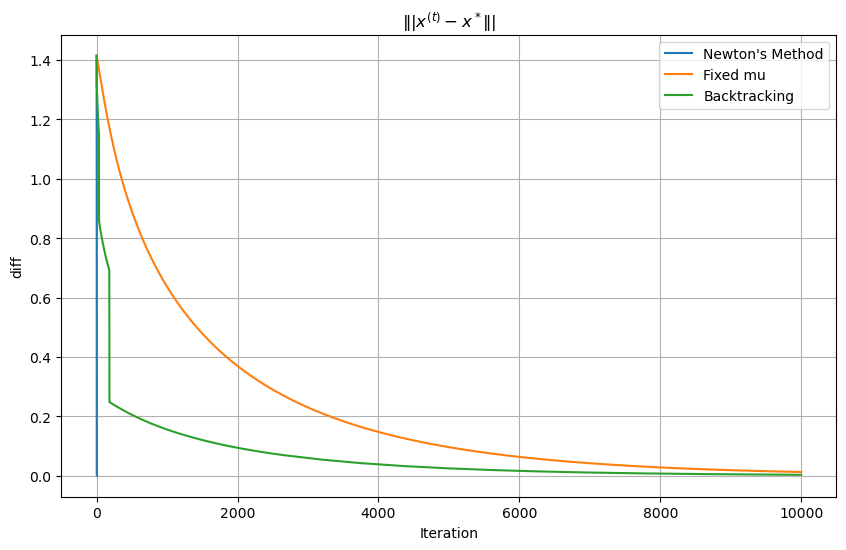

In [27]:
x0 = np.array([0, 0])

#get x(t) from newton_method
newton_x = newtons_method(x0)

#get x(t) from fix mu gradient descent
fix_mu = grad_descent(x0)

#get x(t) from backtracking
backtracking = backtracking_gradient_descent(x0)

# Define x*
x_star = np.array([1, 1])

# Compute the norms of the differences for x(t)
norms1 = np.linalg.norm(newton_x - x_star, axis=1)
norms2 = np.linalg.norm(fix_mu - x_star, axis=1)
norms3 = np.linalg.norm(backtracking - x_star, axis=1)

# Plot the norms
plt.figure(figsize=(10, 6))
plt.plot(norms1, label='Newton\'s Method')
plt.plot(norms2, label='Fixed mu')
plt.plot(norms3, label='Backtracking')
plt.title('$\||x^{(t)} - x^*\||$')
plt.xlabel('Iteration')
plt.ylabel('diff')
plt.legend()
plt.grid()
plt.show()

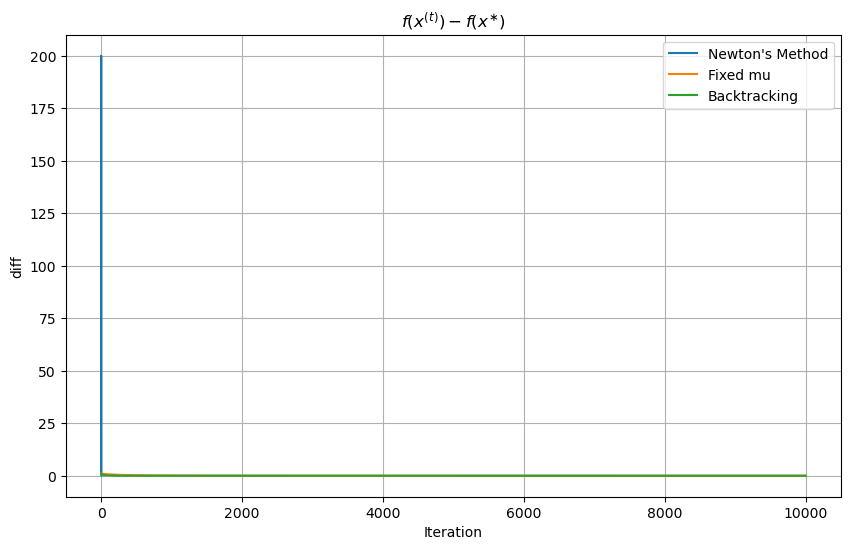

In [28]:
# Compute the norms of the differences for f(x(t))
dff1 = np.array([f(x) - f(x_star) for x in newton_x])
dff2 = np.array([f(x) - f(x_star) for x in fix_mu])
dff3 = np.array([f(x) - f(x_star) for x in backtracking])

# Plot the norms
plt.figure(figsize=(10, 6))
plt.plot(dff1, label='Newton\'s Method')
plt.plot(dff2, label='Fixed mu')
plt.plot(dff3, label='Backtracking')
plt.title('$f(x^{(t)}) − f(x^∗)$')
plt.xlabel('Iteration')
plt.ylabel('diff')
plt.legend()
plt.grid()
plt.show()


**Newtons method** Newtons method have the fastest convergence which converge within 100 iterations. \
\
**Plain Gradient Descent with Fixed Learning Rate:** Gradient descent with a fixed learning rate typically converges more slowly on the function. The number of iterations required for convergence, which could be as high as 10,000, depends significantly on the choice of learning rate and the starting point. Due to the fixed step size, this method might struggle with overshooting or slow progress, particularly in navigating the narrow parts of the function. \
\
**Backtracking Gradient Descent:** Backtracking gradient descent adapts the step size dynamically, making it more effective for complex functions like the function. It tends to converge within about 1,000. The observed slowdown at certain points (e.g., when the difference is around 0.2) is likely due to smaller step sizes chosen to navigate the function's steep and narrow regions cautiously. \
\
**Function Value and Euclidean Distance:** All three methods initially show a rapid decrease in the function value f(x(t)), but this does not always correlate with proximity to the global minimum in terms of Euclidean distance ∥x(t)−x∗∥. For gradient descent with a fixed learning rate, the reduction in Euclidean distance to the global minimum can be notably slower than the decrease in function value. However, for backtracking gradient descent and Newton's method, the decrease in function value and reduction in Euclidean distance can be more aligned, although this depends on implementation details and parameter choices. 


# 3 Coding Question:

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

test = pd.read_csv('mnist_test.csv',header=None)
train = pd.read_csv('mnist_train.csv', header=None)

def preprocess(data):
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    digits = {j:[] for j in range(10)}
    for j in range(len(y)):
        cur_label = int(y[j])
        cur_pixel_data = np.array(X.iloc[j]).reshape(28,28)
        digits[cur_label].append(cur_pixel_data)
    digits = {j:np.stack(digits[j]) for j in range(10)}
    for j in range(10):
        print('shape of data with label', j, ':', digits[j].shape)
    
    return digits

train_digits = preprocess(train)
test_digits = preprocess(test)

train_four_data = train_digits[4]
train_nine_data = train_digits[9]

train_four_labels = np.ones(len(train_four_data))*-1
train_nine_labels = np.ones(len(train_nine_data))

train_four_data = np.reshape(train_four_data, (len(train_four_data), 28*28))
train_nine_data = np.reshape(train_nine_data, (len(train_nine_data), 28*28))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

test_four_data = test_digits[4]
test_nine_data = test_digits[9]

test_four_labels = np.ones(len(test_four_data))*-1
test_nine_labels = np.ones(len(test_nine_data))

test_four_data = np.reshape(test_four_data, (len(test_four_data), 28*28))
test_nine_data = np.reshape(test_nine_data, (len(test_nine_data), 28*28))

test_four_data = test_four_data[:500]
test_nine_data = test_nine_data[:500]

test_four_labels = test_four_labels[:500]
test_nine_labels = test_nine_labels[:500]

test_data = np.concatenate((test_four_data, test_nine_data))
test_labels = np.concatenate((test_four_labels, test_nine_labels))

test_data.shape, test_labels.shape

shape of data with label 0 : (5923, 28, 28)
shape of data with label 1 : (6742, 28, 28)
shape of data with label 2 : (5958, 28, 28)
shape of data with label 3 : (6131, 28, 28)
shape of data with label 4 : (5842, 28, 28)
shape of data with label 5 : (5421, 28, 28)
shape of data with label 6 : (5918, 28, 28)
shape of data with label 7 : (6265, 28, 28)
shape of data with label 8 : (5851, 28, 28)
shape of data with label 9 : (5949, 28, 28)
shape of data with label 0 : (980, 28, 28)
shape of data with label 1 : (1135, 28, 28)
shape of data with label 2 : (1032, 28, 28)
shape of data with label 3 : (1010, 28, 28)
shape of data with label 4 : (982, 28, 28)
shape of data with label 5 : (892, 28, 28)
shape of data with label 6 : (958, 28, 28)
shape of data with label 7 : (1028, 28, 28)
shape of data with label 8 : (974, 28, 28)
shape of data with label 9 : (1009, 28, 28)


((1000, 784), (1000,))

In [30]:
def backtracking_line_search(x, grad, beta=0.5, gamma=0.1, lr=1):
    while f(x - lr * grad) > f(x) - lr * gamma * np.dot(grad, grad):
        lr = beta * lr
    return lr

def backtracking_gradient_descent(x, tol=1e-6, max_iter=1000, beta=0.5, gamma=0.1):
    his = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        lr = backtracking_line_search(x, grad)

        x = x - lr * grad
        his.append(x)

        if np.linalg.norm(grad) < tol:
            break

    return his

In [31]:
def logistic_loss(w, X, y):
    z = np.dot(X, w)
    log_loss = np.log(1+np.exp(-y*z))
    log_loss = np.clip(log_loss, a_min=None, a_max = 500) 
    return np.mean(log_loss)


def logistic_loss_gradient(w, X, y):
    z = np.dot(X,w)
    sigmoid = 1/(1+np.exp(-z))
    gradient = np.dot(X.T, (sigmoid-(y==1))) / X.shape[0]
    return gradient

def backtracking_gd(X, y, beta=0.8, gamma=0.5, max_iter=10000, tol=1e-6):
    w = np.zeros(X.shape[1])
    losses = []
    for epoch in range(max_iter):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)
        lr = 0.1

        while logistic_loss(w - lr * gradient, X, y) > loss - lr * gamma * np.linalg.norm(gradient)**2:
            lr = beta * lr
        
        w = w - lr * gradient

        if np.linalg.norm(gradient) < tol:
            break

    return w, losses

w, losses = backtracking_gd(train_data, train_labels)



/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_9368/3588504003.py:3: RuntimeWarning: overflow encountered in exp
  log_loss = np.log(1+np.exp(-y*z))


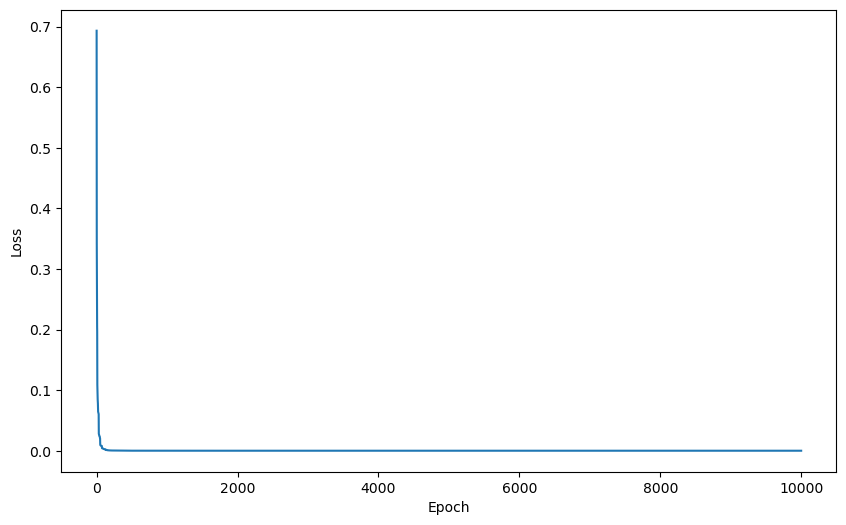

In [32]:
# plot the losses here
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()